<h1><b><i>Principal Component Analysis</i> (<i>PCA</i>) </b></h1>

<p>Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>ανάλυσης σε κύριες συνιστώσες</i></b> (<b><i>Principal Component Analysis</i></b>, <b><i>PCA</i></b>), υλοποιημένο σύμφωνα με τη <b><i>μέθοδο συνδιακύμανσης</i></b> (<b><i>covariance method</i></b>). Για να κατανοήσετε τη χρησιμότητα της μεθόδου θα εκπαιδεύσετε και θα αξιολογήσετε την ακρίβεια ενός μοντέλου <b><i>logistic regression</i></b> για ένα dataset πριν και μετά την εφαρμογή του αλγορίθμου <b><i>PCA</i></b>. Περισσότερες πληροφορίες για τη μέθοδο αυτή μπορείτε να αναζητήσετε <a href="https://ourarchive.otago.ac.nz/handle/10523/7534">εδώ</a>.</p>

<p>Η άσκηση περιλαμβάνει <b><i>δύο</i></b> προγράμματα <i>Python</i>: (a) το πρώτο δέχεται ένα dataset σε μορφή .<i>csv</i>, εφαρμόζει τον αλγόριθμο <b><i>PCA</i></b> και δημιουργεί το αρχείο <b><i>foo.csv</i></b> με το μετασχηματισμένο dataset, όπως προκύπτει από τις κύριες συνιστώσες που επέλεξε ο χρήστης να διατηρήσει, (b) το δεύτερο δέχεται ένα αρχείο σε μορφή .<i>csv</i>, διαχωρίζει το dataset σε <i>training</i> και <i>test set</i>, εκπαιδεύει ένα μοντέλο <b><i>logistic regression</i></b>, χρησιμοποιώντας το <i>training set</i> και υπολογίζει τον αριθμό των σφαλμάτων του μοντέλου πάνω στο <i>test set</i>.</p>

<p>Το dataset που θα χρησιμοποιήσετε παρέχεται σε δύο μορφές: (a) <b><i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i></b> και (b) <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i></b>, το οποίο δεν περιλαμβάνει την πρώτη στήλη του <b><i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i></b>, δηλαδή τα <i>labels</i> που αντιστοιχούν σε κάθε είσοδο. Τα datasets αυτά αποτελούν απλοποιημένη μορφή του dataset που μπορεί να βρεθεί <a href="https://archive.ics.uci.edu/ml/datasets/wine">εδώ</a>.</p>

<font color='#486393'>Οι απαντήσεις στα ερωτήματα γράφονται σε αυτό το χρώμα, προκειμένου να διαφοροποιούνται από την εκφώνηση της άσκησης. Σημειώνεται, επίσης, ότι κάποιες από τις αρχικές εντολές έχουν γίνει commented out, για λόγους εμφάνισης και συντομίας.</font>

<h3><b><i>Ανάλυση σε Κύριες Συνιστώσες</i></b></h3>
<p>Αρχικά, θα φορτώσετε τις βιβλιοθήκες που απαιτούνται για το πρόγραμμα που θα αναλύσει το dataset <b><i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i></b> στις κύριες συνιστώσες του.</p>

In [1]:
#https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
from numpy import genfromtxt
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np

<p>Στη συνέχεια, θα φορτώσετε το dataset <b><i></i></b></p>

In [2]:
data = genfromtxt('https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3b.csv', delimiter=',')

<p>Έπειτα, θα υπολογίσετε το μέσο όρο κάθε στήλης (feature) του dataset και θα κανονικοποιήσετε κάθε feature με αυτόν</p>

In [3]:
M = mean(data.T, axis=1)
data_normal = data - M

<p>Στη συνέχεια, θα υπολογίσετε το <b><i>πίνακα συνδιακύμανσης</i></b> (<b><i>covariance matrix</i></b>) για το dataset</p>

In [4]:
covariance = cov(data_normal.T)
#print("The covariance matrix of the normalized data is the following: ")
#print(covariance)

<p>Το επόμενο βήμα είναι να υπολογίσετε τις <b><i>ιδιοτιμές</i></b> (<b><i>eigenvalues</i></b>) και τα <b><i>ιδιοδιανύσματα</i></b> (<b><i>eigenvectors</i></b>) του dataset.</p>

In [5]:
values, vectors = eig(covariance)
#print("The eigenvalues of the normalized data are the following: ")
#print(values)

<p>Στη συνέχεια, θα επιλέξετε τις πιο σημαντικές <b><i>ιδιοτιμές</i></b> και θα προσαρμόσετε αντίστοιχα τα <b><i>ιδιοδιανύσματα</i></b> του dataset.</p>

In [6]:
new_values = values[0:3]
#print("The most important eigenvalues are the following: ")
#print(new_values)
new_vectors = vectors[0:3]
#print("The most important eigenvectors are the following: ")
#print(new_vectors)

<p>Τώρα, θα εφαρμόσετε τα νέα <b><i>ιδιοδιανύσματα</i></b> στο παλιό dataset για να πάρετε το νέο, μειωμένο σε μέγεθος dataset.</p>

In [7]:
new_data = new_vectors.dot(data_normal.T)

<p>Να αποθηκεύσετε το νέο dataset σε ένα αρχείο <i>csv</i>.</p>

In [8]:
np.savetxt("foo.csv", new_data.T, delimiter=",")

<h4><b><i>Ερωτήσεις</i></b></h4>
<ul>
<li>Να μελετήσετε το παραπάνω πρόγραμμα και να περιγράψετε, σύντομα, τα βήματα που ακολουθεί ο αλγόριθμος <b><i>PCA</i></b>, υλοποιημένος με τη μέθοδο <b><i>covariance</i></b>. Να συμπεριλάβετε και τις μαθηματικές πράξεις.</li>
<li>Να εφαρμόσετε τον αλγόριθμο <b><i>PCA</i></b> πάνω στα δεδομένα του αρχείου <i><a href="https://github.com/nkostopoulos/StochasticsLabPublic/blob/master/lab2/demo3b.csv">demo3b.csv</a></i>. Στη συνέχεια, να καταγράψετε τον <i>πίνακα συνδιακύμανσης</i> του dataset και τις ιδιοτιμές του πίνακα αυτού. Τι υποδηλώνουν οι θετικές και τι οι αρνητικές τιμές του <i>πίνακα συνδιακύμανσης</i>; Να διατάξετε τις <i>ιδιοτιμές</i> σε φθίνουσα σειρά. Τι παρατηρείτε για τις τρεις πρώτες σε σχέση με τις υπόλοιπες; Πόσες <i>κύριες συνιστώσες</i> επιλέγει να διατηρήσει ο αλγόριθμος;</li>
</ul>

#### Απαντήσεις

- <font color='#486393'>Γενικά, τα δεδομένα της άσκησης αποτελούν $N = 130$ δειγματικά σημεία, καθ' ένα εκ των οποίων αποτελείται από $m = 13$ χαρακτηριστικά. Έτσι, τα σημεία αυτά μεταφορτώνονται σε έναν πίνακα $\tilde{X}$, με διαστάσεις $N\times m$ και στοιχεία $\tilde{X}_{ij}$. Κατόπιν, η μέση τιμή του $i$-οστού χαρακτηριστικού, $\mu_i$, υπολογίζεται ως</font>

<font color='#486393'>$$ \mu_i = \frac{1}{N}\sum_{n=1}^{N}{\tilde{X}_{ni}}, $$</font>

<font color='#486393'>με σκοπό να αφαιρεθεί από κάθε δειγματικό σημείο, προκειμένου η μέση τιμή ως προς κάθε χαρακτηριστικό να ισούται με μηδέν:</font>

<font color='#486393'>$$ X = \tilde{X} - \mu, $$</font>

<font color='#486393'>όπου με $\mu$ συμβολίζεται ο $N\times m$ πίνακας που σε κάθε γραμμή του έχει το διάνυσμα $\vec{\mu} = \left(\mu_1,\dots,\mu_{m}\right)$. Χρησιμοποιώντας το νέο πίνακα $X$, υπολογίζεται ο αντίστοιχος πίνακας συνδιακύμανσης των χαρακτηριστικών, δηλαδή ο $m \times m$ πίνακας $C$, του οποίου το στοιχείο $C_{ij}$ αντιστοιχεί στη συνδιακύμανση μεταξύ του $i$-οστού και $j$-οστού χαρακτηριστικού:</font>

<font color='#486393'>$$ C_{ij} = \frac{1}{N-1}\sum_{n=1}^{N}{\left(X_{ni}-\mu_i\right)\left(X_{nj}-\mu_j\right)} $$</font>

<font color='#486393'>Προφανώς, στην περίπτωση $i=j$ προκύπτει η διακύμανση του $i$-οστού χαρακτηριστικού. Με δεδομένο τον πίνακα συνδιακύμανσης, το επόμενο βήμα είναι ο υπολογισμός των ιδιοδιανυσμάτων του, $\vec{x}$, και των ιδιοτιμών του, $\lambda$, λύνοντας το πρόβλημα:</font>

<font color='#486393'>$$ C \vec{x} = \lambda \vec{x} $$</font>

<font color='#486393'>Ο λόγος για τον οποίο είναι απαραίτητος ο προσδιορισμός των ιδιοδιανυσμάτων και των ιδιοτιμών του πίνακα συνδιακύμανσης είναι πως, για ένα πρόβλημα $m$ χαρακτηριστικών, το σφάλμα προσέγγισης PCA μέσω των $k$ κύριων συνιστωσών, $J$, θα ισούται με</font>

<font color='#486393'>$$ J = \sum_{i=k+1}^{m}{\lambda_i}, $$</font>

<font color='#486393'>όπου οι ιδιοτιμές του πίνακα συνδιακύμανσης θεωρούνται κανονικοποιημένες και έχουν διαταχθεί σύμφωνα με τη σύμβαση $\lambda_1 \geq \dots \geq \lambda_k \geq \lambda_{k+1} \geq \dots \geq \lambda_m$. Σημειώνεται πως στον κώδικα που έχει δοθεί παραπάνω θεωρούμε $k = 3$. Έτσι, αφότου το πρόβλημα ιδιοτιμών-ιδιοδιανυσμάτων του πίνακα $C$ λυθεί, επιλέγονται τα $k$ ιδιοδιανύσματα που αντιστοιχούν στις $k$ υψηλότερες ιδιοτιμές, κατασκευάζοντας τον $k \times m$ πίνακα $\Sigma$ για τον οποίο ισχύει</font>

<font color='#486393'>$$ \Sigma = \left(\vec{x}_1 \dots \vec{x}_k \right)^\top. $$</font>

<font color='#486393'>Ο πίνακας αυτός αξιοποιείται, τελικά, για το μετασχηματισμό των αρχικών δεδομένων σε ένα νέο σύνολο $N$ δειγματικών σημείων με $k$ χαρακτηριστικά, σύμφωνα με τη σχέση:</font>

<font color='#486393'>$$ X_{\text{transformed}} = X \cdot \Sigma^\top $$</font>

- <font color='#486393'>Πολλά από τα ζητούμενα της δεύτερης ερώτησης είναι ήδη υλοποιημένα στον κώδικα που παρέχεται με το παρόν Notebook. Σε ό,τι αφορά το πρόσημο των τιμών του πίνακα συνδιακύμανσης, αυτό σχετίζεται με τον τρόπο που το $i$-οστό χαρακτηριστικό επηρεάζει το $j$-ιστό χαρακτηριστικό. Συγκεκριμένα, εάν $C_{ij} > 0$, τότε αυξάνοντας την τιμή του χαρακτηριστικού $i$ αναμένεται μια αύξηση και στην τιμή του χαρακτηριστικού $j$, με την τιμή του $C_{ij}$ να ποσοτικοποιεί το πόσο έντονη είναι η συσχέτιση αυτή. Ένα παράδειγμα τέτοιων χαρακτηριστικών θα μπορούσε να είναι η θερμοκρασία του περιβάλλοντος και το πλήθος κόσμου σε μια παραλία. Από την άλλη, εάν $C_{ij} < 0$, τότε αυξήσεις στην τιμή του $i$ συνεπάγονται μειώσεις στην τιμή του $j$ και αντιστρόφως, με την απόλυτη τιμή του $C_{ij}$ να ποσοτικοποιεί το πόσο έντονη είναι η αρνητική αυτή συσχέτιση. Ένα παράδειγμα τέτοιας αρνητικής συσχέτισης αποτελεί το πόσο κρύο έχει έξω με το πλήθος του κόσμου που παθαίνει ηλίαση.</font>

<font color='#486393'>Οι ιδιοτιμές του πίνακα συνδιακύμανσης διατεταγμένες σε φθίνουσα σειρά φαίνονται ακολούθως:</font>

In [9]:
print("Οι ιδιοτιμές του πίνακα συνδιακύμανσης σε φθίνουσα σειρά είναι οι εξής:")
print(sorted(values,reverse=True))

Οι ιδιοτιμές του πίνακα συνδιακύμανσης σε φθίνουσα σειρά είναι οι εξής:
[124313.0734445996, 193.45602626538712, 9.50168321005973, 1.3250016880448925, 0.8105956686469235, 0.4510817126522683, 0.26915783148551287, 0.16099338038872155, 0.1111003434002614, 0.05874216855219718, 0.03203128519816893, 0.02197825281275498, 0.006133989998101058]


<font color='#486393'>Γίνεται αμέσως εμφανές πως οι τρεις πρώτες (και ειδικά η πρώτη) ιδιοτιμές είναι σημαντικά υψηλότερες από τις υπόλοιπες, με τη μεγαλύτερη να ξεπερνά τη μικρότερη κατά 8 (!) τάξεις μεγέθους. Όπως αναφέρθηκε και παραπάνω, το σφάλμα προσέγγισης της PCA για $k$ κύριες συνιστώσες δίνεται από το άθροισμα των $d-k$ μικρότερων ιδιοτιμών, θεωρώντας πως έχουν κανονικοποιηθεί. Στην προκείμενη περίπτωση, όπου έχουν επιλεγεί 3 κύριες συνιστώσες, το σφάλμα αυτό θα ισούται με:</font>

In [10]:
print(f"Το σφάλμα προσέγγισης 3 κυρίων συνιστωσών ισούται με {100*sum(values[3:])/sum(values):.4f}%")

Το σφάλμα προσέγγισης 3 κυρίων συνιστωσών ισούται με 0.0026%


<font color='#486393'>Αξίζει να σημειωθεί πως ακόμη κι αν κανείς κρατούσε μόνο την πρώτη κύρια συνιστώσα, τότε το σφάλμα της προσέγγισης θα ήταν μόλις:</font>

In [11]:
print(f"Το σφάλμα προσέγγισης 1 κύριας συνιστώσας ισούται με {100*sum(values[1:])/sum(values):.4f}%")

Το σφάλμα προσέγγισης 1 κύριας συνιστώσας ισούται με 0.1656%


<font color='#486393'>Γεγονός το οποίο, φυσικά, οφείλεται στην πολύ υψηλή τιμή της πρώτης κύριας συνιστώσας σε σχέση με τις υπόλοιπες.

<h3><b><i>Logistic Regression</i></b></h3>

<p>Αρχικά, θα φορτώσετε τις απαραίτητες βιβλιοθήκες.</p>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Στη συνέχεια, θα φορτώσετε τα datasets που θα χρησιμοποιηθούν για την εκπαίδευση του μοντέλου <b><i>logistic regression</i></b>. Στην πρώτη περίπτωση, θα εκπαιδεύσετε το μοντέλο, χρησιμοποιώντας το αρχείο <i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i>. Στη δεύτερη περίπτωση, θα φορτώσετε το αρχείο <i>foo.csv</i> που πήρατε ως έξοδο από το προηγούμενο τμήμα κώδικα της άσκησης (<i>Ανάλυση σε Κύριες Συνιστώσες</i>), προσθέτοντας στην πρώτη στήλη του αρχείου τα labels που υπάρχουν στην πρώτη στήλη του αρχείου <a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv"><i>demo3a.csv</i></a>.

In [13]:
# Στην παρακάτω εντολή προστέθηκε η επιλογή header=None προκειμένου η πρώτη γραμμή των δεδομένων να μη διαβάζεται ως ονόματα χαρακτηριστικών
df = pd.read_csv("https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv", header=None)

<p>Έπειτα, θα χωρίσετε το dataset σε <i>training</i> και <i>test set</i>.</p>

In [14]:
# Separate the input features from the target variable
x = df.iloc[:,1:13].values
y = df.iloc[:,0].values
# Split the dataset into train and test set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.2, random_state=62)

<p>Έπειτα, θα εκπαιδεύσετε το μοντέλο <b><i>Logistic Regression</i></b></p>

In [15]:
%%time
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain, Ytrain)

Wall time: 45.8 ms


LogisticRegression(max_iter=1000)

<p>Τέλος, θα λάβετε τις προβλέψεις του μοντέλου που εκπαιδεύσατε πάνω στο test set και θα υπολογίσετε τα συνολικά λάθη.</p>

In [16]:
# Get the predictions on the test set
prediction = classifier.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
    if prediction[index] != Ytest[index]:
        errors += 1

print(f"Total errors on the test dataset: {errors}")

Total errors on the test dataset: 0


<h4><b><i>Ερώτηση</i></b></h4>
<p>Να εκτελέσετε παραπάνω τμήματα κώδικα με είσοδο τα αρχεία (a) <i><a href="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv">demo3a.csv</a></i> και (b) <i>foo.csv</i>. Τι παρατηρείτε για την ακρίβεια του μοντέλου στις δύο περιπτώσεις; Δοκιμάστε και για την περίπτωση που κρατάμε (α) 1 και (β) 2 <i>κύριες συνιστώσες</i>. Τι παρατηρείτε;</p>

#### Απάντηση

<font color='#486393'>Στην περίπτωση του αρχείου demo3a.csv, το οποίο περιλαμβάνει το αρχικό σύνολο δεδομένων όπου κάθε δειγματικό σημείο περιγράφεται από 13 χαρακτηριστικά, φαίνεται πως η ακρίβεια του μοντέλου είναι η βέλτιστη, αφού τα σφάλματα ταξινόμησης είναι 0. Φυσικά, σε ένα τόσο μικρό σύνολο δεδομένων, η εμπιστοσύνη για αυτό το αποτέλεσμα δε μπορεί να είναι πολύ υψηλή. Εύκολα μπορεί κανείς να δει πως αλλάζοντας τη `random_state`, η οποία έχει εισαχθεί καθαρά για λόγους συνέπειας στις διαφορετικές εκτελέσεις του Notebook, το σύνολο των σφαλμάτων μπορεί να αυξηθεί (π.χ. να γίνει 1 ή 2).</font>

<font color='#486393'>Επαναλαμβάνοντας την ίδια διαδικασία για το αρχείο foo.csv, στο οποίο το δείγμα περιγράφεται από 3 χαρακτηριστικά (τις τρεις κύριες συνιστώσες), προκύπτουν τα ακόλουθα.</font>

In [17]:
foo_df = pd.read_csv("foo.csv", header=None)

x = foo_df.values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.2, random_state=62)

In [18]:
%%time
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain, Ytrain)

Wall time: 4.99 ms


LogisticRegression(max_iter=1000)

In [19]:
prediction = classifier.predict(Xtest)

errors = 0
for index in range(0,len(prediction) - 1):
    if prediction[index] != Ytest[index]: errors += 1

print(f"Total errors on the test dataset: {errors}")

Total errors on the test dataset: 0


<font color='#486393'>Εκ του αποτελέσματος, φαίνεται πως η ακρίβεια του μοντέλου παραμένει η μέγιστη (0 σφάλματα) και στην περίπτωση των τριών συνιστωσών. Κάτι τέτοιο είναι λογικό, μιας και το σφάλμα της προσέγγισης τριών συνιστωσών μέσω PCA είναι υπερβολικά μικρή για να φανεί σε ένα τόσο μικρό στατιστικό δείγμα. Φυσικά, πρέπει να τονιστεί ξανά πως το δείγμα είναι μικρό και ως εκ τούτου ένας διαφορετικός διαμοιρασμός των δεδομένων σε σύνολα εκπαίδευσης και αξιολόγησης θα μπορούσε να οδηγήσει σε διαφορετικά αποτελέσματα.</font>

<font color='#486393'>Η ίδια διαδικασία επαναλαμβάνεται και διατηρώντας μόνο τις δύο πρώτες κύριες συνιστώσες (τονίζεται πως οι κύριες συνιστώσες είναι τοποθετημένες στο foo_df αντίστροφα, δηλαδή η πρώτη κύρια συνιστώσα - αυτή που αντιστοιχεί στην υψηλότερη ιδιοτιμή του πίνακα συνδιακύμανσης - αντιστοιχεί στην τρίτη και όχι την πρώτη στήλη του foo_df):</font>

In [20]:
x = foo_df.iloc[:,1:3].values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.2, random_state=62)

In [21]:
%%time
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain, Ytrain)

Wall time: 3.99 ms


LogisticRegression(max_iter=1000)

In [22]:
prediction = classifier.predict(Xtest)

errors = 0
for index in range(0,len(prediction) - 1):
    if prediction[index] != Ytest[index]: errors += 1

print(f"Total errors on the test dataset: {errors}")

Total errors on the test dataset: 1


<font color='#486393'>Φαίνεται πως το πλήθος σφαλμάτων αυξήθηκε κατά ένα, γεγονός όμως το οποίο δεν αποδίδεται απαραίτητα στη μείωση της διαστατικότητας των δεδομένων, αφού ακόμα και με δύο μόνο κύριες συνιστώσες το σφάλμα της προσέγγισης είναι εξαιρετικά χαμηλό. Επαναλαμβάνοντας τη διαδικασία και με μία μόνο κύρια συνιστώσα προκύπτει:</font>

In [23]:
x = foo_df.iloc[:,2:3].values
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.2, random_state=62)

In [24]:
%%time
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain, Ytrain)

Wall time: 3.99 ms


LogisticRegression(max_iter=1000)

In [25]:
prediction = classifier.predict(Xtest)

errors = 0
for index in range(0,len(prediction) - 1):
    if prediction[index] != Ytest[index]: errors += 1

print(f"Total errors on the test dataset: {errors}")

Total errors on the test dataset: 1


<font color='#486393'>Ακόμα και με μία μόνο κύρια συνιστώσα, το πλήθος των σφαλμάτων δεν αυξάνεται περαιτέρω, γεγονός αναμενόμενο βάσει της ανάλυσης που έχει προηγηθεί. Παρ' όλα αυτά, αξίζει να αναφερθεί πως μια σημαντική διαφορά από εκτέλεση σε εκτέλεση (πλην της τελευταίας) είναι ο συνολικός απαιτούμενος χρόνος εκπαίδευσης, γεγονός το οποίο θα σχολιαστεί εκτενέστερα στη δεύτερη συμπληρωματική ερώτηση.</font>

<h3><b><i>Συμπληρωματικές Ερωτήσεις</i></b></h3>
<ul>
<li>Ποια είναι η χρησιμότητα του αλγορίθμου <b><i>PCA</i></b> ως προς τη δυνατότητα <i>οπτικοποίησης</i> (<i>visualization</i>) των δεδομένων του dataset;</li>
<li>Ποια είναι η χρησιμότητα του αλγορίθμου <b><i>PCA</i></b> ως προς την ταχύτητα εκπαίδευσης του μοντέλου logistic regression; Να βασίσετε την απάντησή σας στα δύο παρακάτω τμήματα κώδικα.</li>
</ul>

- <font color='#486393'>Σε ό,τι αφορά τη δυνατότητα οπτικοποίησης των δεδομένων, εν γένει αυτή είναι εφικτή ανεξαρτήτως της διάστασής τους: παρότι χωρικά υπάρχει ο αυτονόητος περιορισμός των τριών διαστάσεων, επιπλέον διαστάσεις μπορούν να αποτυπωθούν σε ένα διάγραμμα διασποράς αξιοποιώντας άλλες μεθόδους, όπως την εισαγωγή ενός χρωματικού κώδικα, την αυξομείωση του μεγέθους των σημείων, κ.α. Φυσικά, είναι λογικό ένα διάγραμμα διασποράς να καταλήγει να είναι μη αναγνώσιμο στην περίπτωση πολλών χαρακτηριστικών (μπορεί κανείς να φανταστεί μια προσπάθεια οπτικοποίησης των δεδομένων της παρούσας άσκησης, τα οποία χαρακτηρίζονται από 13 χαρακτηριστικά, και το κατά πόσο το τελικό διάγραμμα διασποράς θα παρείχε οποιαδήποτε ουσιαστική πληροφορία). Στο συγκεκριμένο πρόβλημα η PCA δίνει μια πολύ άμεση λύση, αφού αποτελεί αλγόριθμο διαστατικής μείωσης. Χρησιμοποιώντας μόνο 3 κύριες συνιστώσες (όπως στην προκείμενη περίπτωση), η οπτικοποίηση των δειγματικών σημείων μπορεί να γίνει με τρόπο τετριμμένο σε ένα τρισδιάστατο σύστημα αξόνων (βλ. παρακάτω σχήμα). Επιπλέον, η κωδικοποιημένη πληροφορία είναι αντιπροσωπευτική του γενικού προβλήματος, αφού έχει εξασφαλιστεί πως το σφάλμα της προσέγγισης είναι επαρκώς μικρό (στην περίπτωσή μας της τάξης του $\mathcal{O}\left(10^{-3}\right)%$).

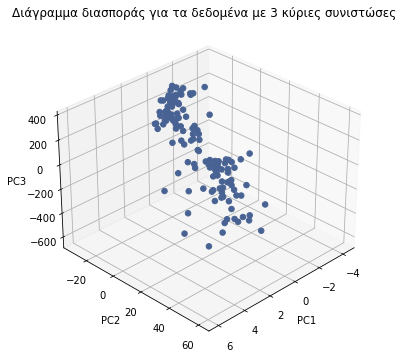

In [26]:
fig = plt.figure(figsize=[9,6])
ax = fig.add_subplot(111, projection = '3d')

x, y, z = foo_df[0], foo_df[1], foo_df[2]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

ax.view_init(30, 45)

mycol = (72/255, 99/255, 147/255)
sc = ax.scatter(x, y, z, s=30, color=mycol, alpha=1)

ax.set_title('Διάγραμμα διασποράς για τα δεδομένα με 3 κύριες συνιστώσες')
plt.show()

<font color='#486393'>Για του λόγου το αληθές, παρατίθεται και μια ισοδύναμη οπτικοποίηση των τριών κυρίων συνιστωσών χρησιμοποιώντας δύο χωρικές διαστάσεις και ένα χρωματικό κώδικα.</font>

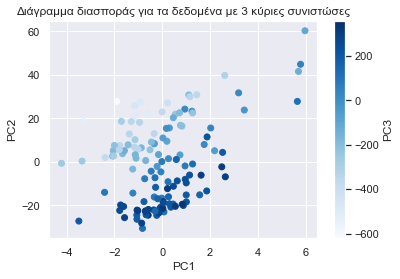

In [27]:
import seaborn as sns
sns.set(style = "darkgrid") # καθαρά αισθητικοί λόγοι

fig, ax = plt.subplots()

im = ax.scatter(x, y, c=z, cmap='Blues')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title('Διάγραμμα διασποράς για τα δεδομένα με 3 κύριες συνιστώσες')

cb = fig.colorbar(im, ax=ax)
cb.set_label('PC3')

plt.show()

- <font color='#486393'>Δεδομένου πως ο κώδικας εκπαίδευσης κάθε μοντέλου χρονομετρήθηκε μέσω της `%%time`, μας δίνεται η δυνατότητα να μελετήσουμε την επιρροή της εφαρμογής της PCA στην ταχύτητα εκπαίδευσης του μοντέλου. Τα αποτελέσματα που φαίνονται στα επί μέρους κελιά του Notebook συνοψίζονται στον ακόλουθο πίνακα. Σημειώνεται πως οι χρόνοι που παρατίθενται δεν έχουν κάποια φυσική σημασία ως απόλυτα μεγέθη, αφού εξαρτώνται από την ταχύτητα του επεξεργαστή του μηχανήματος όπου ο κώδικας έτρεξε τοπικά. Αντιθέτως, οι σχετικές διαφορές μεταξύ των χρόνων είναι αυτές που παρουσιάζουν ενδιαφέρον.</font>
    
| Πλήθος Χαρακτηριστικών | Χρόνος εκτέλεσης |
|:---:|:---:|
| 13 | 45.8 ms |
| 3 | 4.99 ms |
| 2 | 3.99 ms |
| 1 | 3.99 ms |

<font color='#486393'>Γίνεται εμφανές πως, αν και οι διαφορές είναι ανεπαίσθητες λόγω της απλότητας του μοντέλου και του πλήθους των διαθέσιμων δεδομένων, όσο μειώνεται το πλήθος των διαστάσεων τόσο μειώνεται και ο απαραίτητος χρόνος εκπαίδευσης του μοντέλου λογιστικής παλινδρόμησης. Προφανώς, σε περιπτώσεις πιο περίπλοκων μοντέλων (π.χ. βαθιών νευρωνικών δικτύων) ή/και υψηλότερου όγκου δεδομένων, η επιρροή της PCA στον απαιτούμενο χρόνο εκπαίδευσης μέσω της διαστατικής μείωσης που πραγματοποιεί θα ήταν πολύ πιο αισθητή.</font>